# **Reuse MLP with Mnist Model on Omniglot Dataset**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
input_units = 784       #input− 2048− 1000− 2048−output
hidd1_units= 2048      #number of units in the first hidden layer
hidd2_units = 1000
output1_units = input_units
nb_classes = 10

###**LOAD DATA SET**

In [ ]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [ ]:
print(y_train.shape, 'train target')
print(y_test.shape, 'test target')

(60000,) train target
(10000,) test target


In [ ]:
# convert class vectors to binary class matrices
y_train1 = np_utils.to_categorical(y_train, nb_classes)
y_test1 = np_utils.to_categorical(y_test, nb_classes)

###**DEFNINE AUTOENCODER-1 MODEL ARCHITECTURE**

In [ ]:
#AUTOENCODER-1
ae_model1 = Sequential()
ae_model1.add(Dense(hidd1_units, input_dim=input_units, kernel_initializer='uniform', activation='relu'))
ae_model1.add(Dense(hidd2_units, activation='relu'))
ae_model1.add(Dense(hidd1_units, activation='relu'))
ae_model1.add(Dense(output1_units, activation='sigmoid'))
ae_model1.compile(loss='mse', optimizer='adam', metrics=['accuracy','mse'])

### **TRAIN AUTOENCODER-1**

In [ ]:
ae_model1.fit(X_train, X_train, epochs=10, batch_size=512, shuffle=True)

Epoch 1/10
118/118 [==============================] - 48s 397ms/step - loss: 0.0718 - accuracy: 0.0084 - mse: 0.0718
Epoch 2/10
118/118 [==============================] - 47s 397ms/step - loss: 0.0121 - accuracy: 0.0119 - mse: 0.0121
Epoch 3/10
118/118 [==============================] - 47s 398ms/step - loss: 0.0081 - accuracy: 0.0140 - mse: 0.0081
Epoch 4/10
118/118 [==============================] - 47s 398ms/step - loss: 0.0067 - accuracy: 0.0140 - mse: 0.0067
Epoch 5/10
118/118 [==============================] - 47s 399ms/step - loss: 0.0060 - accuracy: 0.0149 - mse: 0.0060
Epoch 6/10
118/118 [==============================] - 47s 397ms/step - loss: 0.0056 - accuracy: 0.0142 - mse: 0.0056
Epoch 7/10
118/118 [==============================] - 47s 400ms/step - loss: 0.0053 - accuracy: 0.0155 - mse: 0.0053
Epoch 8/10
118/118 [==============================] - 47s 400ms/step - loss: 0.0051 - accuracy: 0.0164 - mse: 0.0051
Epoch 9/10
118/118 [==============================] - 48s 403ms/

In [ ]:
ae_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              1607680   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              2049000   
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              2050048   
_________________________________________________________________
dense_3 (Dense)              (None, 784)               1606416   
Total params: 7,313,144
Trainable params: 7,313,144
Non-trainable params: 0
_________________________________________________________________


# **OMNIGLOT DATASET**

In [ ]:
#! git clone https://github.com/brendenlake/omniglot # run this only for one time

In [ ]:
#!unzip "/content/drive/My Drive/omniglot/python/images_background.zip" -d "/content/drive/My Drive/omniglot/python/" # run this code line only once

In [ ]:
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from keras.datasets import mnist
from keras.models import load_model
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
from skimage.io import imread
import cv2
from PIL import Image

In [ ]:
def load_data(alpha_path):
    X = []
    y = []
    lang_dict = {}
    classNo = 0
    class_n = 0

    for letter in sorted(os.listdir(alpha_path)):
        cat_images= []
        for img in sorted(os.listdir(os.path.join(alpha_path,letter))):
            img_path = os.path.join(alpha_path,letter,img)
            
            img_array = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2GRAY)

            img_pil = Image.fromarray(img_array)
            img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

           
            cat_images.append(img_28x28)
        y.append(cat_images)
        classNo += 1
        X.append(cat_images)

    X = np.array(X)
    y = np.array(y)
    return X, y

In [ ]:
train_path = "/content/drive/My Drive/omniglot/python/images_background/Sanskrit"
X, y = load_data(train_path)

In [ ]:
X.shape, y.shape

((42, 20, 28, 28), (42, 20, 28, 28))

In [ ]:
omn_train = np.reshape(X,(840, 784))
omn_test = np.reshape(y,(840, 784))
print(omn_train.shape, 'train samples')
print(omn_test.shape, 'test samples')

(840, 784) train samples
(840, 784) test samples


##**IMAGE RECONSTRUCTION**

In [ ]:
decoded_imgs = ae_model1.predict(omn_test)

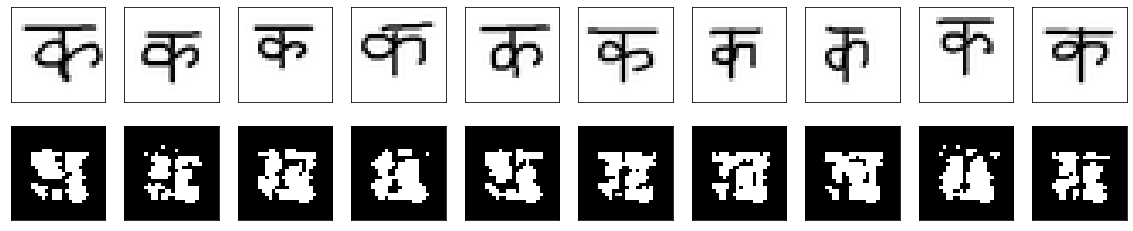

In [ ]:
#Next, let's visualize ten of the input images and the reconstructed outputs from auto encoder module1.

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #Convert test image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(omn_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #How many items to display
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##**MEAN SQUARE ERROR**

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(omn_test, decoded_imgs)
MSE

56699.53